In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer



In [4]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
X = df.drop('math score', axis=1)

In [8]:
y = df['math score']

In [12]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

In [17]:
numeric_transfomer = StandardScaler()
oh_tranformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_tranformer, cat_features),
        ('StandardScaler', numeric_transfomer, num_features),
    ]
)

In [18]:
X = preprocessor.fit_transform(X)

In [21]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [27]:
def evaluate_model(true, predicated):
    mae = mean_absolute_error(true, predicated)
    mse = mean_squared_error(true, predicated)
    rmse = np.sqrt(mean_squared_error(true, predicated))
    r2_square = r2_score(true, predicated)
    return mae, mse, rmse, r2_square

In [29]:
models = {
    'Linear Regression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'XG Boost': XGBRegressor(),
    'ADA Boost': AdaBoostRegressor()
}

model_list = []
r2_list = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print('----- Model Performance for Training Set -----')
    print('-- Root mean Squared Error: {:.4f}'.format(model_train_rmse))
    print('-- Mean Squared Error: {:.4f}'.format(model_train_mse))
    print('-- Mean Absolate Error: {:.4f}'.format(model_train_mae))
    print('-- R2 Score: {:.4f}'.format(model_train_r2))
    print('---------------------------------------------------------------')

    print('----- Model Performance for Test Set -----')
    print('-- Root mean Squared Error: {:.4f}'.format(model_test_rmse))
    print('-- Mean Squared Error: {:.4f}'.format(model_test_mse))
    print('-- Mean Absolate Error: {:.4f}'.format(model_test_mae))
    print('-- R2 Score: {:.4f}'.format(model_test_r2))
    print('---------------------------------------------------------------')

    r2_list.append(model_test_r2)
    print('='*30)
    print('\n')
     



Linear Regression
----- Model Performance for Training Set -----
-- Root mean Squared Error: 5.3244
-- Mean Squared Error: 28.3488
-- Mean Absolate Error: 4.2683
-- R2 Score: 0.8743
---------------------------------------------------------------
----- Model Performance for Test Set -----
-- Root mean Squared Error: 5.4021
-- Mean Squared Error: 29.1822
-- Mean Absolate Error: 4.2186
-- R2 Score: 0.8801
---------------------------------------------------------------


Lasso
----- Model Performance for Training Set -----
-- Root mean Squared Error: 6.5938
-- Mean Squared Error: 43.4784
-- Mean Absolate Error: 5.2063
-- R2 Score: 0.8071
---------------------------------------------------------------
----- Model Performance for Test Set -----
-- Root mean Squared Error: 6.5197
-- Mean Squared Error: 42.5064
-- Mean Absolate Error: 5.1579
-- R2 Score: 0.8253
---------------------------------------------------------------


Ridge
----- Model Performance for Training Set -----
-- Root mean Sq

In [31]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2 Score']).sort_values(by=['R2 Score'], ascending=False) 

,Model Name,R2 Score
2,Ridge,0.880593
0,Linear Regression,0.880076
5,Random Forest Regressor,0.851689
7,ADA Boost,0.850458
6,XG Boost,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783681
4,Decision Tree Regressor,0.754026


In [32]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print('Accuracy of the model is: {:.2f}'.format(score))


Accuracy of the model is: 88.01


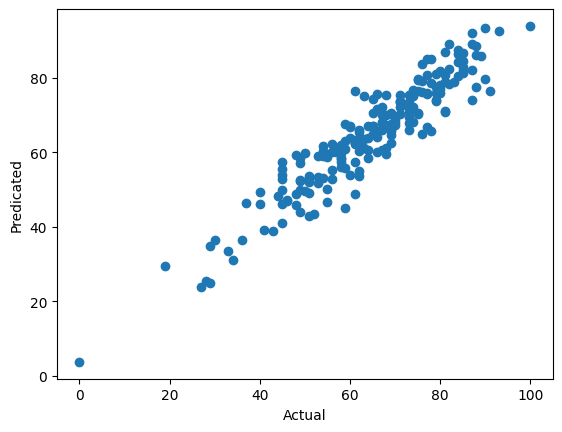

In [34]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicated')
plt.show()

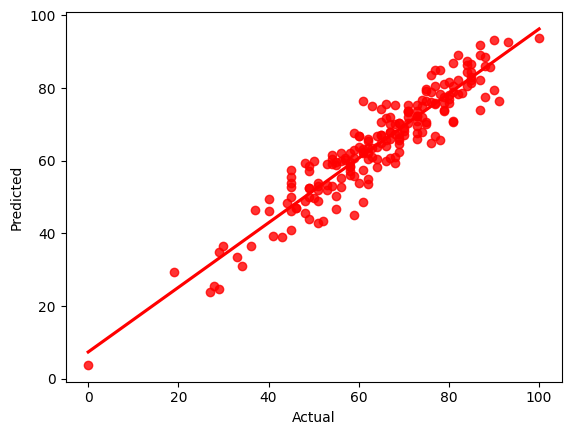

In [36]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [37]:
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value':y_pred, 'Difference':y_test-y_pred})
pred_df.head()

,Actual Value,Predicted Value,Difference
521,91,76.515625,14.484375
737,53,58.984375,-5.984375
740,80,76.882812,3.117188
660,74,76.742188,-2.742188
411,84,87.500000,-3.500000
